In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from tempfile import gettempdir
import zipfile
import gensim.models.word2vec
from gensim.models import Word2Vec
import gensim
import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
import matplotlib.pyplot as plt
import collections
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))


C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuyin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuyin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yuyin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  rawdata=[]
  with zipfile.ZipFile(filename) as f:
#     data = tf.compat.as_str(f.read(f.namelist()[1])).split()
   
    for file in f.namelist():
    
        data=f.read(file)
        
    #     BeautifulSoup(data,"lxml")
        soup=BeautifulSoup(data,"html5lib")
        data= soup.get_text().lower()
        data = re.sub(r"[^a-zA-Z0-9]", " ", data)
#         data = re.findall(r"[^a-zA-Z]", data)
        words = word_tokenize(data)
   
        words = [w for w in words if w not in stopwords.words("english")]
    #     words = [PorterStemmer().stem(w) for w in words]
        words = [WordNetLemmatizer().lemmatize(w) for w in words]
      
        rawdata.append(words)
  return rawdata
filename='C:\\20news-bydate-train.zip'
vocabulary = read_data(filename)


In [3]:
a=tuple (vocabulary)


In [4]:
count =[]
for i in range(len(vocabulary)):
    for word in a[i]:   
        count.append(word)


In [5]:
count =[_ for _ in count if not _.isdigit()]
count=[_ for _ in count if not _ in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t',
                              'u','v','w','x','y','z' ]]
count=[_ for _ in count if not _ in ['1','2','3','4','5','6','7','8','9']]

In [6]:
model = Word2Vec([count], size=500, window=5, min_count=10, workers=2, sg=1)

In [7]:
print(model.wv.similar_by_word("evolution",topn=20))

[('murder', 0.9988117218017578), ('think', 0.9988107085227966), ('person', 0.9988052845001221), ('one', 0.9988021850585938), ('writes', 0.9987962245941162), ('people', 0.9987908601760864), ('like', 0.9987888336181641), ('organization', 0.9987834692001343), ('well', 0.9987673759460449), ('say', 0.9987617135047913), ('first', 0.9987599849700928), ('definition', 0.9987597465515137), ('system', 0.9987587332725525), ('innocent', 0.9987576007843018), ('com', 0.9987534284591675), ('human', 0.9987533092498779), ('atheist', 0.9987480640411377), ('would', 0.9987456798553467), ('mean', 0.9987415075302124), ('even', 0.9987398982048035)]


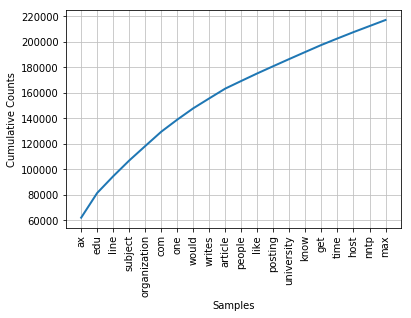

In [8]:
fdist1 = nltk.FreqDist(count)
fdist1.plot(20, cumulative=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


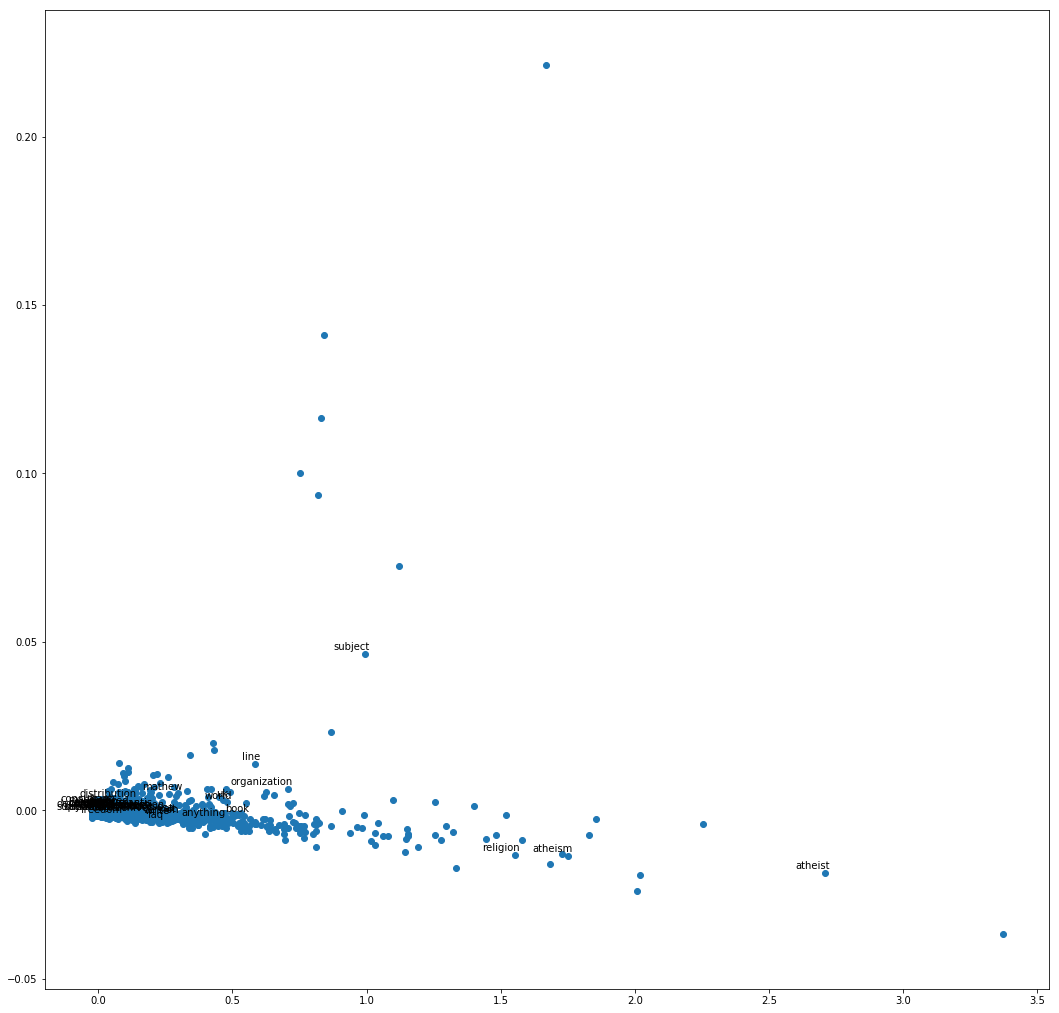

In [9]:
from sklearn.decomposition import PCA
from matplotlib import pyplot


X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(18, 18))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:50]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
pyplot.show()



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


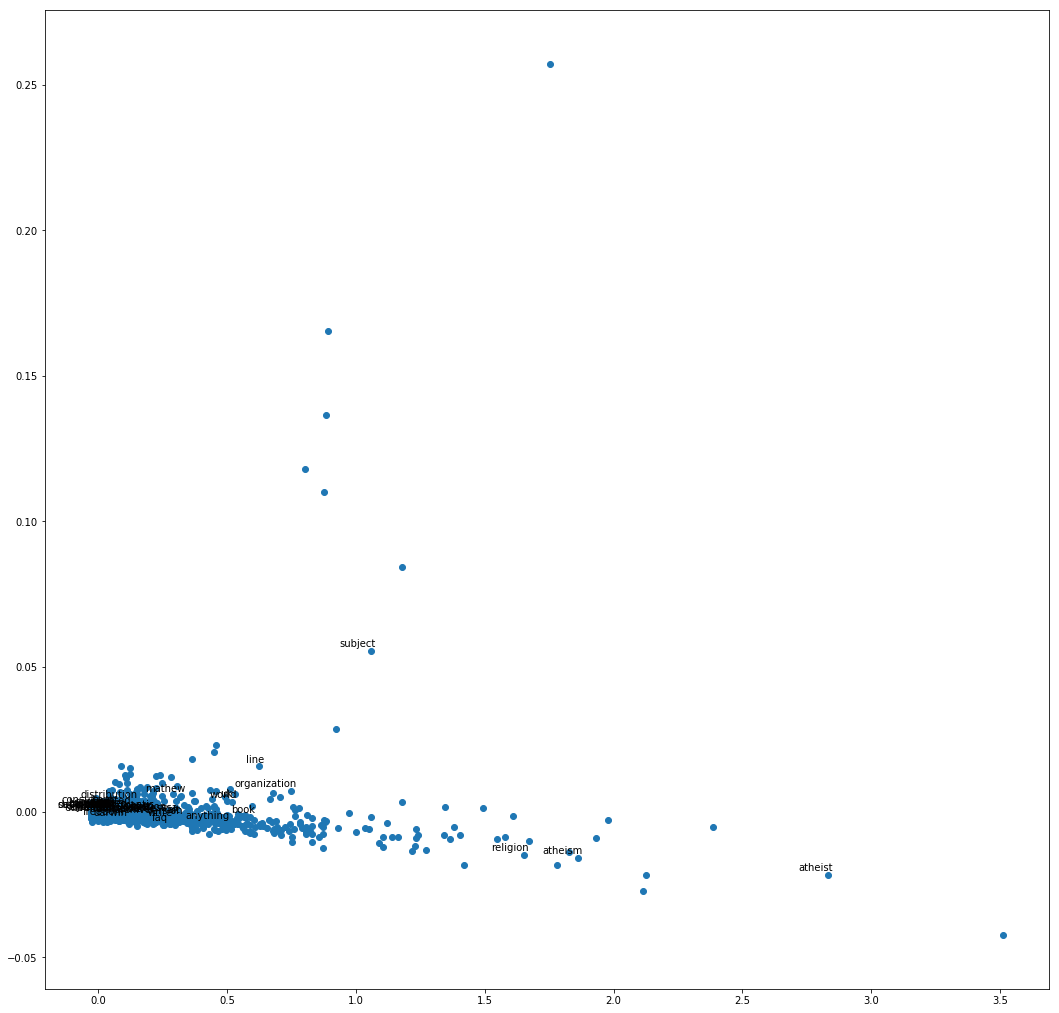

In [59]:
model = Word2Vec([count], size=350, window=5, min_count=10, workers=2, sg=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(18, 18))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:50]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
pyplot.show()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


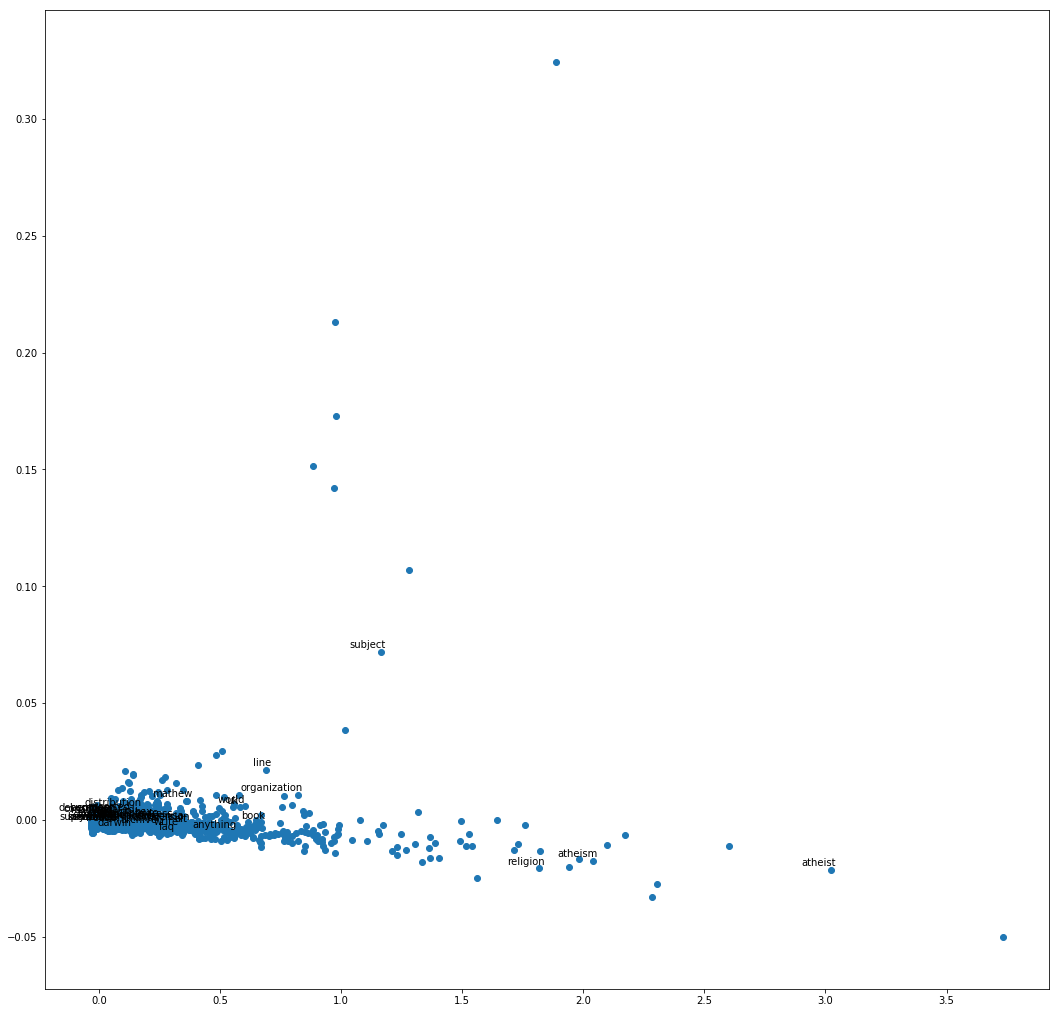

In [60]:
model = Word2Vec([count], size=200, window=5, min_count=10, workers=2, sg=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(18, 18))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:50]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
pyplot.show()


In [12]:
# model.save("./news.model")

# model.wv.save_word2vec_format("./news.model.bin",binary=True)
# model= gensim.models.KeyedVectors.load_word2vec_format ("./news.model.bin", binary=True)
# m=gensim.models.Word2Vec.load("./news.model.bin")
print(model.wv.vocab)

{'mathew': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0CEF0>, 'subject': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0CA20>, 'alt': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0CD30>, 'atheism': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0CFD0>, 'faq': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0CA90>, 'atheist': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0C6A0>, 'resource': <gensim.models.keyedvectors.Vocab object at 0x000000001EC0CBE0>, 'summary': <gensim.models.keyedvectors.Vocab object at 0x000000001EC42B38>, 'book': <gensim.models.keyedvectors.Vocab object at 0x000000001EC42C50>, 'address': <gensim.models.keyedvectors.Vocab object at 0x000000001EC42E10>, 'music': <gensim.models.keyedvectors.Vocab object at 0x000000001EC26240>, 'anything': <gensim.models.keyedvectors.Vocab object at 0x000000001EC269E8>, 'related': <gensim.models.keyedvectors.Vocab object at 0x000000001EC263C8>, 'keywords': <gensim.mod

In [13]:
model['process']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.15587413e-02,  1.68020912e-02, -1.41181964e-02, -1.09257018e-02,
       -5.00153610e-03, -2.20337790e-03,  5.56724006e-03, -2.09401809e-02,
       -1.35195944e-02, -1.08340215e-02,  3.72287090e-04, -1.39310872e-02,
        5.71355689e-03,  1.38661675e-02,  2.34252657e-03, -7.72063946e-03,
        5.46482683e-04, -4.64078318e-03,  5.26378863e-04, -4.65490529e-03,
        1.01971929e-03,  5.74711012e-03,  4.67858976e-03,  2.23507062e-02,
       -1.41813830e-02, -8.14472605e-03, -5.15090954e-03,  3.86565016e-03,
        5.47935860e-03, -2.40757852e-03,  4.03342769e-03,  2.19217166e-02,
       -5.90780750e-03,  4.41891700e-03, -1.30598713e-02, -1.62215016e-04,
       -5.88813098e-03,  8.77446961e-03,  9.12191626e-03, -4.63962508e-03,
       -4.35474701e-03,  1.22833960e-02, -1.41522745e-02,  4.70212894e-03,
        1.84763931e-02,  7.41911773e-03,  5.85031882e-03, -1.39733637e-02,
       -9.20104794e-03, -8.07030406e-03, -1.88005231e-02, -1.91411078e-02,
       -5.98607212e-03,  

In [14]:
len(model.wv.vectors[0])

200

In [15]:
vector_dim= 200

In [16]:
import numpy as np
embedding_matrix = np.zeros((len(model.wv.vocab), vector_dim))
for i in range(len(model.wv.vocab)):
    embedding_vector = model.wv[model.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [131]:
import tensorflow as tf
import numpy as np
class TextCNN(object):
    """
    A CNN for text classification.
    Uses an embedding layer, followed by a convolutional, max-pooling and softmax layer.
    """
    def __init__(
      self, sequence_length, num_classes, vocab_size  ,embedding_matrix,
      embedding_size, filter_sizes, num_filters, l2_reg_lambda=0.0):
        # embedding_matrix,
        # Placeholders for input, output and dropout
        self.input_x = tf.placeholder(tf.int32, [None, sequence_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, [None, num_classes], name="input_y")

        self.dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")

        # Keeping track of l2 regularization loss (optional)
        l2_loss = tf.constant(0.0)
        #Embedding layer
        # with tf.device('/cpu:0'), tf.name_scope("embedding"):
        #     W = tf.Variable(
        #         tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0),
        #         name="W")
        #     self.embedded_chars = tf.nn.embedding_lookup(W, self.input_x)
        #     self.embedded_chars_expanded = tf.expand_dims(self.embedded_chars, -1)
        with tf.device('/cpu:0'), tf.name_scope("embedding"):
            self.embedded_chars = tf.nn.embedding_lookup(embedding_matrix, self.input_x)
            self.embedded_chars_expanded = tf.expand_dims(self.embedded_chars, -1)
#             self.embedded_chars_expanded = tf.cast(self.embedded_chars_expanded,dtype=tf.float32)
            print(self.embedded_chars_expanded.shape)

        # Create a convo
        #
        # lution + maxpool layer for each filter size
        pooled_outputs = []
        for i, filter_size in enumerate(filter_sizes):
            with tf.name_scope("conv-maxpool-%s" % filter_size):
                # Convolution Layer
                filter_shape = [filter_size, embedding_size, 1, num_filters]
                W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")
                b = tf.Variable(tf.constant(0.1, shape=[num_filters]), name="b")
                conv = tf.nn.conv2d(
                    self.embedded_chars_expanded,
                    W,
                    strides=[1, 1, 1, 1],
                    padding="VALID",
                    name="conv2D")
                # Apply nonlinearity
                h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu")
                # Maxpooling over the outputs
                pooled = tf.nn.max_pool(
                    h,
                    ksize=[1, sequence_length - filter_size + 1, 1, 1],
                    strides=[1, 1, 1, 1],
                    padding='VALID',
                    name="pool")
                pooled_outputs.append(pooled)

        # Combine all the pooled features
        num_filters_total = num_filters * len(filter_sizes)
        self.h_pool = tf.concat(pooled_outputs, 3)
        self.h_pool_flat = tf.reshape(self.h_pool, [-1, num_filters_total])

        # Add dropout
        with tf.name_scope("dropout"):
            self.h_drop = tf.nn.dropout(self.h_pool_flat, self.dropout_keep_prob)

        # Final (unnormalized) scores and predictions
        with tf.name_scope("output"):
            W = tf.get_variable(
                "W",
                shape=[num_filters_total, num_classes],
                initializer=tf.contrib.layers.xavier_initializer())
            b = tf.Variable(tf.constant(0.1, shape=[num_classes]), name="b")
            l2_loss += tf.nn.l2_loss(W)
            l2_loss += tf.nn.l2_loss(b)
            self.scores = tf.nn.xw_plus_b(self.h_drop, W, b, name="scores")
            self.probability = tf.nn.sigmoid(self.scores)
            self.predictions = tf.argmax(self.scores, 1, name="predictions")

        # CalculateMean cross-entropy loss
        with tf.name_scope("loss"):
            losses = tf.nn.softmax_cross_entropy_with_logits(labels=self.input_y, logits=self.scores)
            self.loss = tf.reduce_mean(losses) + l2_reg_lambda * l2_loss

        # Accuracy
        with tf.name_scope("accuracy"):
            correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")




In [121]:
import numpy as np
import re
import itertools
from collections import Counter


def clean_str(string):
    
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()


def load_data_and_labels(positive_data_file):
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files
    positive_examples = list(open(positive_data_file, "r").readlines())
    positive_examples = [s.strip() for s in positive_examples]
#     negative_examples = list(open(negative_data_file, "r").readlines())
#     negative_examples = [s.strip() for s in negative_examples]
    # Split by words
    x_text = positive_examples #+ negative_examples
    x_text = [clean_str(sent) for sent in x_text]
    # Generate labels
    positive_labels = [[0, 1] for _ in positive_examples]
#     negative_labels = [[1, 0] for _ in negative_examples]
    y = np.concatenate([positive_labels], 0)
    return [x_text, y]


def batch_iter(data, batch_size, num_epochs, shuffle=True):
    """
    Generates a batch iterator for a dataset.
    """
    data = np.array(data)
    data_size = len(data)
    num_batches_per_epoch = int((len(data)-1)/batch_size) + 1
    for epoch in range(num_epochs):
        # Shuffle the data at each epoch
        if shuffle:
            shuffle_indices = np.random.permutation(np.arange(data_size))
            shuffled_data = data[shuffle_indices]
        else:
            shuffled_data = data
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, data_size)
            yield shuffled_data[start_index:end_index]


In [122]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D,Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from keras.models import Model
from keras.callbacks import EarlyStopping

# 文本序列长度
MAX_SEQUENCE_LENGTH = 1000
# 单词最大数量
MAX_NUM_WORDS = 12000
# 词向量长度
EMBEDDING_DIM = model.wv.vectors.shape[1]
print(EMBEDDING_DIM)

200


In [123]:
def unique(list):
    newlist = []
    for x in list:
        if x not in newlist:
            newlist.append(x)
    return newlist

In [124]:
import os
from os.path import isfile, isdir, join
# assert isdir(news20_path), "The news20 is not availaible"

train_path = "C:\\20news-bydate-train"
test_path = "C:\\20news-bydate-test"
f1='a'
f2='b'

train_x = []
train_y = []
test_x = []
test_y = []
y=[]
for foldername in os.listdir(train_path):
    folder_path = join(train_path, foldername)
    print(foldername)
    for filename in os.listdir(folder_path):
        f = open(folder_path + '/' + filename, 'rb').read()
        train_x.append(f)
        train_y.append(foldername)

for foldername in os.listdir(test_path):   
    folder_path = join(test_path, foldername)

    for filename in os.listdir(folder_path):
        f = open(folder_path + '/' + filename, 'rb').read()
        test_x.append(f)
        test_y.append(foldername)

y= list(set(train_y))




alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [125]:
def label(label):
    label_1= []
    folder_path=join(train_path,label)
    for filename in os.listdir(folder_path):
        example = list(open(folder_path + '/' + filename, 'rb').readlines())
        label_1.extend(example)
    return label_1

label1 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1] for _ in label('alt.atheism')]
label2 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0] for _ in label('comp.graphics')]
label3 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0] for _ in label('comp.os.ms-windows.misc')]
label4 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0] for _ in label('comp.sys.ibm.pc.hardware')]
label5 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0] for _ in label('comp.sys.mac.hardware')]
label6 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0] for _ in label('comp.windows.x')]
label7 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0] for _ in label('misc.forsale')]
label8 = [[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0] for _ in label('rec.autos')]
label9 = [[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0] for _ in label('rec.motorcycles')]
label10 = [[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0] for _ in label('rec.sport.baseball')]
label11= [[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0] for _ in label('rec.sport.hockey')]
label12= [[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0] for _ in label('sci.crypt')]
label13= [[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('sci.electronics')]
label14= [[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('sci.med')]
label15= [[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('sci.space')]
label16= [[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('soc.religion.christian')]
label17= [[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('talk.politics.guns')]
label18= [[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('talk.politics.mideast')]
label19= [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('talk.politics.misc')]
label20= [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] for _ in label('talk.religion.misc')]







# y = np.concatenate([label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,
#                     label11,label12,label13,label14,label15,label16,label17,label18,label19,label20], 0)






In [126]:
import tensorflow as tf
import numpy as np
import os
import time
import datetime

from tensorflow.contrib import learn
y = np.concatenate([label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,
                    label11,label12,label13,label14,label15,label16,label17,label18,label19,label20], 0)

# Build vocabulary
max_document_length = max([len(x.split(" ")) for x in count])
vocab_processor = learn.preprocessing.VocabularyProcessor(max_document_length)
x = np.array(list(vocab_processor.fit_transform(count)))

# Randomly shuffle data
np.random.seed(10)
shuffle_indices = np.random.permutation(np.arange(len(y)))
x_shuffled = x[shuffle_indices]
y_shuffled = y[shuffle_indices]

# # Split train/test set
# # TODO: This is very crude, should use cross-validation
# dev_sample_index = -1 * int(1* float(len(y)))
# x_train, x_dev = x_shuffled[:dev_sample_index], x_shuffled[dev_sample_index:]
# y_train, y_dev = y_shuffled[:dev_sample_index], y_shuffled[dev_sample_index:]
x_train, x_dev, y_train, y_dev = train_test_split(x_shuffled, y_shuffled, test_size=0.1)
del x, y, x_shuffled, y_shuffled

print("Vocabulary Size: {:d}".format(len(vocab_processor.vocabulary_)))
print("Train/Dev split: {:d}/{:d}".format(len(y_train), len(y_dev)))


Vocabulary Size: 97172
Train/Dev split: 460455/51162


In [127]:
sequence_length=x_train.shape[1],
num_classes=y_train.shape[1],
vocab_size=len(vocab_processor.vocabulary_),
embedding_matrix=embedding_matrix,
embedding_size=200,
filter_sizes=list(map(int, "3,4,5".split(","))),
num_filters=128,
l2_reg_lambda=0.0

In [132]:
import time

print(x_train.shape[1])


"""Step 5: build a graph and cnn object"""
graph = tf.Graph()
with graph.as_default():
    session_conf = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
    sess = tf.Session(config=session_conf)
    with sess.as_default():
        cnn = TextCNN(
            sequence_length=x_train.shape[1],
            num_classes=y_train.shape[1],
            vocab_size=len(vocab_processor.vocabulary_),
            embedding_matrix=embedding_matrix,
            embedding_size=200,
            filter_sizes=list(map(int, [3,4,5])),
            num_filters=200,
            l2_reg_lambda=0.0)

        global_step = tf.Variable(0, name="global_step", trainable=False)
        optimizer = tf.train.AdamOptimizer(1e-3)
        grads_and_vars = optimizer.compute_gradients(cnn.loss)
        train_op = optimizer.apply_gradients(grads_and_vars, global_step=global_step)

        timestamp = str(int(time.time()))
        out_dir = os.path.abspath(os.path.join(os.path.curdir, "trained_model_" + timestamp))

        checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
        checkpoint_prefix = os.path.join(checkpoint_dir, "model")
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        saver = tf.train.Saver()

                # One training step: train the model with one batch
        def train_step(x_batch, y_batch):
            feed_dict = {
                cnn.input_x: x_batch,
                cnn.input_y: y_batch,
                cnn.dropout_keep_prob: 0.5}
            _, step, loss, acc = sess.run([train_op, global_step, cnn.loss, cnn.accuracy], feed_dict)

        # One evaluation step: evaluate the model with one batch
        def dev_step(x_batch, y_batch):
            feed_dict = {cnn.input_x: x_batch, cnn.input_y: y_batch, cnn.dropout_keep_prob: 1.0}
            step, loss, acc, num_correct = sess.run([global_step, cnn.loss, cnn.accuracy, cnn.num_correct], feed_dict)
            return num_correct

        # Save the word_to_id map since predict.py needs it
        vocab_processor.save(os.path.join(out_dir, "vocab.pickle"))
        sess.run(tf.global_variables_initializer())

        # Training starts here
        train_batches = batch_iter(list(zip(x_train, y_train)), 18, 200)
        best_accuracy, best_at_step = 0, 0

        """Step 6: train the cnn model with x_train and y_train (batch by batch)"""
        for train_batch in train_batches:
            x_train_batch, y_train_batch = zip(*train_batch)
            train_step(np.reshape(x_train_batch,(1,18)), y_train_batch)
            current_step = tf.train.global_step(sess, global_step)

            """Step 6.1: evaluate the model with x_dev and y_dev (batch by batch)"""
            if current_step % params['evaluate_every'] == 0:
                dev_batches = data_helper.batch_iter(list(zip(x_dev, y_dev)), params['batch_size'], 1)
                total_dev_correct = 0
                for dev_batch in dev_batches:
                    x_dev_batch, y_dev_batch = zip(*dev_batch)
                    num_dev_correct = dev_step(x_dev_batch, y_dev_batch)
                    total_dev_correct += num_dev_correct

                dev_accuracy = float(total_dev_correct) / len(y_dev)
                logging.critical('Accuracy on dev set: {}'.format(dev_accuracy))

                """Step 6.2: save the model if it is the best based on accuracy on dev set"""
                if dev_accuracy >= best_accuracy:
                    best_accuracy, best_at_step = dev_accuracy, current_step
                    path = saver.save(sess, checkpoint_prefix, global_step=current_step)
                    logging.critical('Saved model at {} at step {}'.format(path, best_at_step))
                    logging.critical('Best accuracy is {} at step {}'.format(best_accuracy, best_at_step))

        """Step 7: predict x_test (batch by batch)"""
        test_batches = data_helper.batch_iter(list(zip(x_test, y_test)), params['batch_size'], 1)
        total_test_correct = 0
        for test_batch in test_batches:
            x_test_batch, y_test_batch = zip(*test_batch)
            num_test_correct = dev_step(x_test_batch, y_test_batch)
            total_test_correct += num_test_correct

        test_accuracy = float(total_test_correct) / len(y_test)
        logging.critical('Accuracy on test set is {} based on the best model {}'.format(test_accuracy, path))
        logging.critical('The training is complete')




1


ValueError: Argument must be a dense tensor: ((((array([[ 9.31355637e-03,  9.73736215e-03, -1.06746200e-02, ...,
        -9.76334792e-03,  1.22506183e-03, -9.45151225e-03],
       [ 1.13659926e-01,  1.44294500e-01, -1.30621776e-01, ...,
        -1.32142544e-01, -2.32741367e-02, -1.12766266e-01],
       [ 6.29243180e-02,  8.45068544e-02, -7.20076337e-02, ...,
        -6.82325289e-02, -5.40805981e-03, -5.87253310e-02],
       ...,
       [ 9.44203348e-04,  8.90904164e-04, -6.61311555e-04, ...,
         1.12238608e-03,  1.45333703e-04, -2.23007193e-03],
       [-1.63547322e-03, -1.99783407e-03, -7.94602209e-04, ...,
         8.48557276e-04, -1.09841298e-04, -2.02688901e-03],
       [-1.53741194e-03, -1.78943342e-03, -1.17391770e-04, ...,
        -2.23113648e-06,  3.38827580e-04, -1.25852332e-03]]),),),),) - got shape [1, 1, 1, 1, 16797, 200], but wanted [1, 1, 1, 1].

In [ ]:
lst = []
for line in test_x:
    lst += line.split()
    
count_test = Counter(lst)
for k in list(count_test.keys()):
    if k not in embedding_matrix:
        del count_test[k]
    else:
        count_test[k] = count[k]


In [ ]:
#Make the train dataset to be a sequence of ids of words.
for i in range(len(train_x)):
    temp = train_x[i].split()
    for word in temp[:]:
        if word not in count:
            temp.remove(word)
    for j in range(len(temp)):
        temp[j] = count[temp[j]]
    x_train[i] = temp


In [ ]:
for i in range(len(test_x)):
    temp = test_x[i].split()
    for word in temp[:]:
        if word not in count_test:
            temp.remove(word)
    for j in range(len(temp)):
        temp[j] = count_test[temp[j]]
    x_test[i] = temp


In [ ]:

import tensorflow as tf
import numpy as np
import os
import time
import datetime
# import data_helpers
# from text_cnn import TextCNN
from tensorflow.contrib import learn

# Parameters
# ==================================================

# # Data loading params
# tf.flags.DEFINE_float("dev_sample_percentage", .1, "Percentage of the training data to use for validation")
# tf.flags.DEFINE_string("positive_data_file", "./data/rt-polaritydata/rt-polarity.pos", "Data source for the positive data.")
# tf.flags.DEFINE_string("negative_data_file", "./data/rt-polaritydata/rt-polarity.neg", "Data source for the negative data.")

# # Model Hyperparameters
# tf.flags.DEFINE_integer("embedding_dim", 128, "Dimensionality of character embedding (default: 128)")
# tf.flags.DEFINE_string("filter_sizes", "3,4,5", "Comma-separated filter sizes (default: '3,4,5')")
# tf.flags.DEFINE_integer("num_filters", 128, "Number of filters per filter size (default: 128)")
# tf.flags.DEFINE_float("dropout_keep_prob", 0.5, "Dropout keep probability (default: 0.5)")
# tf.flags.DEFINE_float("l2_reg_lambda", 0.0, "L2 regularization lambda (default: 0.0)")

# # Training parameters
# tf.flags.DEFINE_integer("batch_size", 64, "Batch Size (default: 64)")
# tf.flags.DEFINE_integer("num_epochs", 200, "Number of training epochs (default: 200)")
# tf.flags.DEFINE_integer("evaluate_every", 100, "Evaluate model on dev set after this many steps (default: 100)")
# tf.flags.DEFINE_integer("checkpoint_every", 100, "Save model after this many steps (default: 100)")
# tf.flags.DEFINE_integer("num_checkpoints", 5, "Number of checkpoints to store (default: 5)")
# # Misc Parameters
# tf.flags.DEFINE_boolean("allow_soft_placement", True, "Allow device soft device placement")
# tf.flags.DEFINE_boolean("log_device_placement", False, "Log placement of ops on devices")

# FLAGS = tf.flags.FLAGS
# # FLAGS._parse_flags()
# # print("\nParameters:")
# # for attr, value in sorted(FLAGS.__flags.items()):
# #     print("{}={}".format(attr.upper(), value))
# # print("")

# def preprocess():
#     # Data Preparation
#     # ==================================================

#     # Load data
#     print("Loading data...")
#x_text, y =load_data_and_labels("C:\\20news-bydate-train")

#     # Build vocabulary
#max_document_length = max([len(x.split(" ")) for x in x_text])
#vocab_processor = learn.preprocessing.VocabularyProcessor(max_document_length)
#     x = np.array(list(vocab_processor.fit_transform(x_text)))

#     # Randomly shuffle data
#     np.random.seed(10)
#     shuffle_indices = np.random.permutation(np.arange(len(y)))
#     x_shuffled = x[shuffle_indices]
#     y_shuffled = y[shuffle_indices]

#     # Split train/test set
#     # TODO: This is very crude, should use cross-validation
#     dev_sample_index = -1 * int(FLAGS.dev_sample_percentage * float(len(y)))
#     x_train, x_dev = x_shuffled[:dev_sample_index], x_shuffled[dev_sample_index:]
#     y_train, y_dev = y_shuffled[:dev_sample_index], y_shuffled[dev_sample_index:]

#     del x, y, x_shuffled, y_shuffled

#     print("Vocabulary Size: {:d}".format(len(vocab_processor.vocabulary_)))
#     print("Train/Dev split: {:d}/{:d}".format(len(y_train), len(y_dev)))
#     return x_train, y_train, vocab_processor, x_dev, y_dev

def train(x_train, y_train, x_dev, y_dev):
    # Training
    # ==================================================

    with tf.Graph().as_default():
        session_conf = tf.ConfigProto(
          allow_soft_placement=FLAGS.allow_soft_placement,
          log_device_placement=FLAGS.log_device_placement)
        sess = tf.Session(config=session_conf)
        with sess.as_default():
            cnn = TextCNN(
                sequence_length=np.shape(x_train)[0],
                num_classes=np.shape(y_train)[0],
                #vocab_size=len(vocab_processor.vocabulary_),
                vocab_size=len(x_train),
                embedding_matrix= embedding_matrix,
                embedding_size=FLAGS.embedding_dim,
                filter_sizes=list(map(int, FLAGS.filter_sizes.split(","))),
                num_filters=FLAGS.num_filters,
                l2_reg_lambda=FLAGS.l2_reg_lambda)

            # Define Training procedure
            global_step = tf.Variable(0, name="global_step", trainable=False)
            optimizer = tf.train.AdamOptimizer(1e-3)
            grads_and_vars = optimizer.compute_gradients(cnn.loss)
            train_op = optimizer.apply_gradients(grads_and_vars, global_step=global_step)

            # Keep track of gradient values and sparsity (optional)
            grad_summaries = []
            for g, v in grads_and_vars:
                if g is not None:
                    grad_hist_summary = tf.summary.histogram("{}/grad/hist".format(v.name), g)
                    sparsity_summary = tf.summary.scalar("{}/grad/sparsity".format(v.name), tf.nn.zero_fraction(g))
                    grad_summaries.append(grad_hist_summary)
                    grad_summaries.append(sparsity_summary)
            grad_summaries_merged = tf.summary.merge(grad_summaries)

            # Output directory for models and summaries
            timestamp = str(int(time.time()))
            out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
            print("Writing to {}\n".format(out_dir))

            # Summaries for loss and accuracy
            loss_summary = tf.summary.scalar("loss", cnn.loss)
            acc_summary = tf.summary.scalar("accuracy", cnn.accuracy)

            # Train Summaries
            train_summary_op = tf.summary.merge([loss_summary, acc_summary, grad_summaries_merged])
            train_summary_dir = os.path.join(out_dir, "summaries", "train")
            train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)

            # Dev summaries
            dev_summary_op = tf.summary.merge([loss_summary, acc_summary])
            dev_summary_dir = os.path.join(out_dir, "summaries", "dev")
            dev_summary_writer = tf.summary.FileWriter(dev_summary_dir, sess.graph)

            # Checkpoint directory. Tensorflow assumes this directory already exists so we need to create it
            checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
            checkpoint_prefix = os.path.join(checkpoint_dir, "model")
            if not os.path.exists(checkpoint_dir):
                os.makedirs(checkpoint_dir)
            #saver = tf.train.Saver(tf.global_variables(), max_to_keep=FLAGS.num_checkpoints)
            saver = tf.train.Saver(tf.global_variables(), max_to_keep=5)
            # Write vocabulary
            #vocab_processor.save(os.path.join(out_dir, "vocab"))

            # Initialize all variables
            sess.run(tf.global_variables_initializer())

            def train_step(x_batch, y_batch):
                """
                A single training step
                """
                feed_dict = {
                  cnn.input_x: x_batch,
                  cnn.input_y: y_batch,
                  cnn.dropout_keep_prob: FLAGS.dropout_keep_prob
                }
                _, step, summaries, loss, accuracy = sess.run(
                    [train_op, global_step, train_summary_op, cnn.loss, cnn.accuracy],
                    feed_dict)
                time_str = datetime.datetime.now().isoformat()
                print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
                train_summary_writer.add_summary(summaries, step)

            def dev_step(x_batch, y_batch, writer=None):
                """
                Evaluates model on a dev set
                """
                feed_dict = {
                  cnn.input_x: x_batch,
                  cnn.input_y: y_batch,
                  cnn.dropout_keep_prob: 1.0
                }
                step, summaries, loss, accuracy = sess.run(
                    [global_step, dev_summary_op, cnn.loss, cnn.accuracy],
                    feed_dict)
                time_str = datetime.datetime.now().isoformat()
                print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
                if writer:
                    writer.add_summary(summaries, step)

            # Generate batches
            batches = batch_iter(
                #list(zip(x_train, y_train)), FLAGS.batch_size, FLAGS.num_epochs)
                 x_train,64,200)
            # Training loop. For each batch...
            for batch in batches:
                x_batch, y_batch = zip(*batch)
                train_step(x_batch, y_batch)
                current_step = tf.train.global_step(sess, global_step)
                if current_step % FLAGS.evaluate_every == 0:
                    print("\nEvaluation:")
                    dev_step(x_dev, y_dev, writer=dev_summary_writer)
                    print("")
                if current_step % FLAGS.checkpoint_every == 0:
                    path = saver.save(sess, checkpoint_prefix, global_step=current_step)
                    print("Saved model checkpoint to {}\n".format(path))
vocab_processor=(train_x)
train(train_x,train_y,test_x,test_y)

